***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dicionários das variáveis qualitativa

In [3]:
uf = {
     11: 'Rondônia',
     12: 'Acre',
     13: 'Amazonas',
     14: 'Roraima',
     15: 'Pará',
     16: 'Amapá',
     17: 'Tocantins',
     21: 'Maranhão',
     22: 'Piauí',
     23: 'Ceará',
     24: 'Rio Grande do Norte',
     25: 'Paraíba',
     26: 'Pernambuco',
     27: 'Alagoas',
     28: 'Sergipe',
     29: 'Bahia',
     31: 'Minas Gerais',
     32: 'Espírito Santo',
     33: 'Rio de Janeiro',
     35: 'São Paulo',
     41: 'Paraná',
     42: 'Santa Catarina',
     43: 'Rio Grande do Sul',
     50: 'Mato Grosso do Sul',
     51: 'Mato Grosso',
     52: 'Goiás',
     53: 'Distrito Federal'
}
sexo = {
     0: 'Masculino',
     1: 'Feminino'
}
cor = {
     0: 'Indígena',
     2: 'Branca',
     4: 'Preta',
     6: 'Amarela',
     8: 'Parda',
     9: 'Sem declaração'
}
anos_de_estudo = {
     1: 'Sem instrução e menos de 1 ano',
     2: '1 ano',
     3: '2 anos',
     4: '3 anos',
     5: '4 anos',
     6: '5 anos',
     7: '6 anos',
     8: '7 anos',
     9: '8 anos',
     10: '9 anos',
     11: '10 anos',
     12: '11 anos',
     13: '12 anos',
     14: '13 anos',
     15: '14 anos',
     16: '15 anos ou mais',
     17: 'Não determinados',
     np.nan : 'Não aplicável'
}

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [4]:
df = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [5]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [7]:
df[['Idade', 'Anos de Estudo', 'Renda', 'Altura']].describe()

,Idade,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000
mean,44.071421,9.469664,2000.383199,1.699512
std,12.480583,4.539929,3323.387730,0.079717
min,13.000000,1.000000,0.000000,1.339245
25%,34.000000,6.000000,788.000000,1.645785
50%,43.000000,11.000000,1200.000000,1.699325
75%,53.000000,12.000000,2000.000000,1.753062
max,99.000000,17.000000,200000.000000,2.028497


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [8]:
salario_minimo = 788
bins = [
    0,
    2*salario_minimo,
    5*salario_minimo,
    15*salario_minimo,
    25*salario_minimo, 
    df.Renda.max()
    ]

### 2º Definir os labels das classes

In [9]:
labels = ['E', 'D', 'C', 'B', 'A']

In [10]:
df['Classe'] = pd.cut(
    x=df.Renda,
    bins=bins,
    labels=labels,
    include_lowest=True
)

df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,D
4,11,1,47,8,9,150,1.690631,E
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,E
76836,53,0,30,4,7,1500,1.792934,E
76837,53,0,32,8,12,1300,1.830587,E
76838,53,0,57,8,4,1500,1.726344,E


### 3º Construir a coluna de frequências

In [11]:
frequencia = df.Classe.value_counts()
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Classe, dtype: int64

### 4º Construir a coluna de percentuais

In [12]:
percentual = df.Classe.value_counts(normalize=True) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Classe, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [13]:
pd.DataFrame(
    {
    'Frequência': frequencia,
    'Percentual (%)': percentual
    }
    ).sort_index(
    ascending=False
    ).rename_axis('Classe', axis=1)

Classe,Frequência,Percentual (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:>

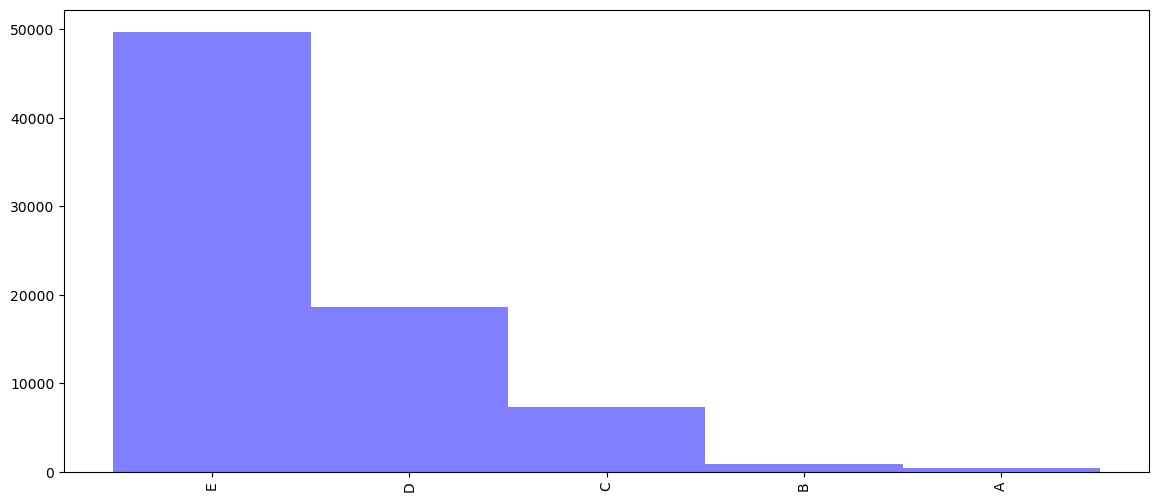

In [17]:
frequencia.plot.bar(width=1, color='blue', alpha=0.5, figsize=(14, 6))

> ### Conclusões
Quando mais baixa a renda, maior a quantidade de pessoas que compõe esta classe. Assim, temos mais pessoas da classe E. E a classe A constitui o menor grupo.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   UF              76840 non-null  int64   
 1   Sexo            76840 non-null  int64   
 2   Idade           76840 non-null  int64   
 3   Cor             76840 non-null  int64   
 4   Anos de Estudo  76840 non-null  int64   
 5   Renda           76840 non-null  int64   
 6   Altura          76840 non-null  float64 
 7   Classe          76840 non-null  category
dtypes: category(1), float64(1), int64(6)
memory usage: 4.2 MB


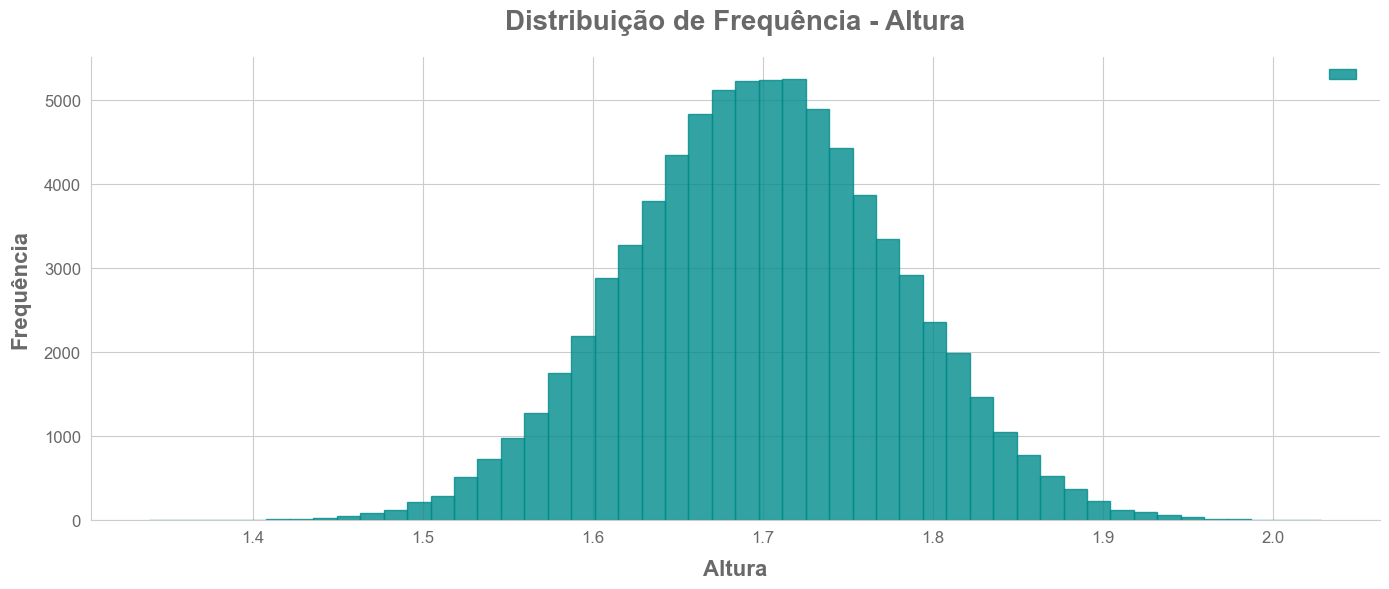

In [88]:
plt.figure(figsize=(14, 6))
sns.set_style('whitegrid')
ax = sns.distplot(df['Altura'], kde=False, hist_kws={'alpha': 0.8, 'edgecolor': 'darkcyan', 'linewidth': 1}, color='darkcyan')
ax.set_title('Distribuição de Frequência - Altura', fontsize=20, fontweight='bold', pad=20, color='dimgray')
ax.set_xlabel('Altura', fontsize=16, fontweight='bold', labelpad=10, color='dimgray')
ax.set_ylabel('Frequência', fontsize=16, fontweight='bold', labelpad=10, color='dimgray')
ax.tick_params(labelsize=12, width=1, colors='dimgray')
ax.legend([''], frameon=False)
sns.despine()
plt.tight_layout()
plt.show()

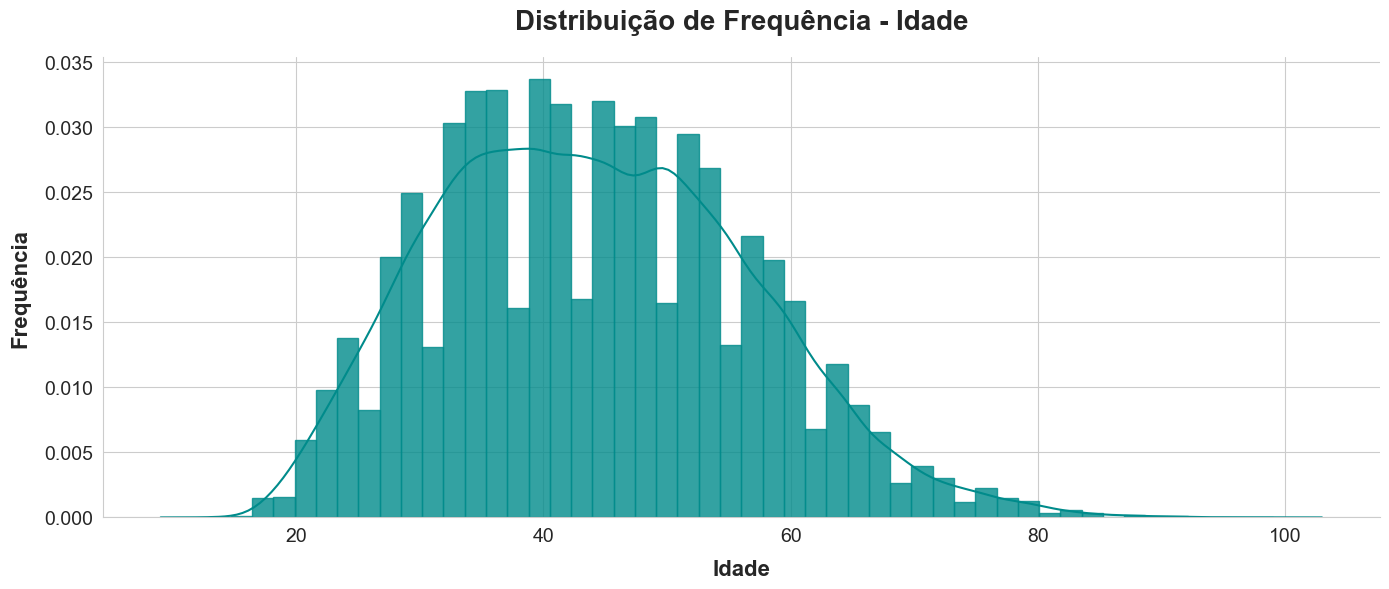

In [81]:
plt.figure(figsize=(14, 6))
sns.set_style('whitegrid')
ax = sns.distplot(df['Idade'], kde=True, hist_kws={'alpha': 0.8, 'edgecolor': 'darkcyan', 'linewidth': 1}, color='darkcyan')
ax.set_title('Distribuição de Frequência - Idade', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Idade', fontsize=16, fontweight='bold', labelpad=10)
ax.set_ylabel('Frequência', fontsize=16, fontweight='bold', labelpad=10)
ax.tick_params(labelsize=14)
sns.despine()
plt.tight_layout()
plt.show()

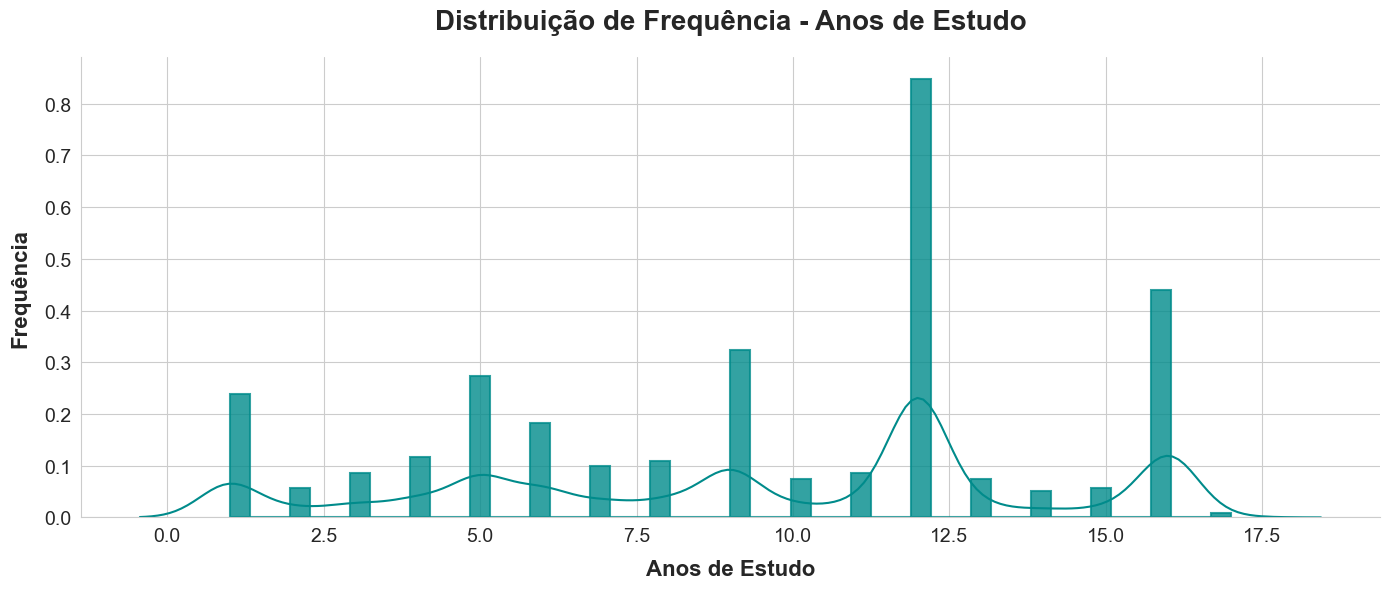

In [89]:
plt.figure(figsize=(14, 6))
sns.set_style('whitegrid')
ax = sns.distplot(df['Anos de Estudo'], kde=True, hist_kws={'alpha': 0.8, 'edgecolor': 'darkcyan', 'linewidth': 1.5}, color='darkcyan')
ax.set_title('Distribuição de Frequência - Anos de Estudo', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Anos de Estudo', fontsize=16, fontweight='bold', labelpad=10)
ax.set_ylabel('Frequência', fontsize=16, fontweight='bold', labelpad=10)
ax.tick_params(labelsize=14)
sns.despine()
plt.tight_layout()
plt.show()

c:\Users\lnune\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


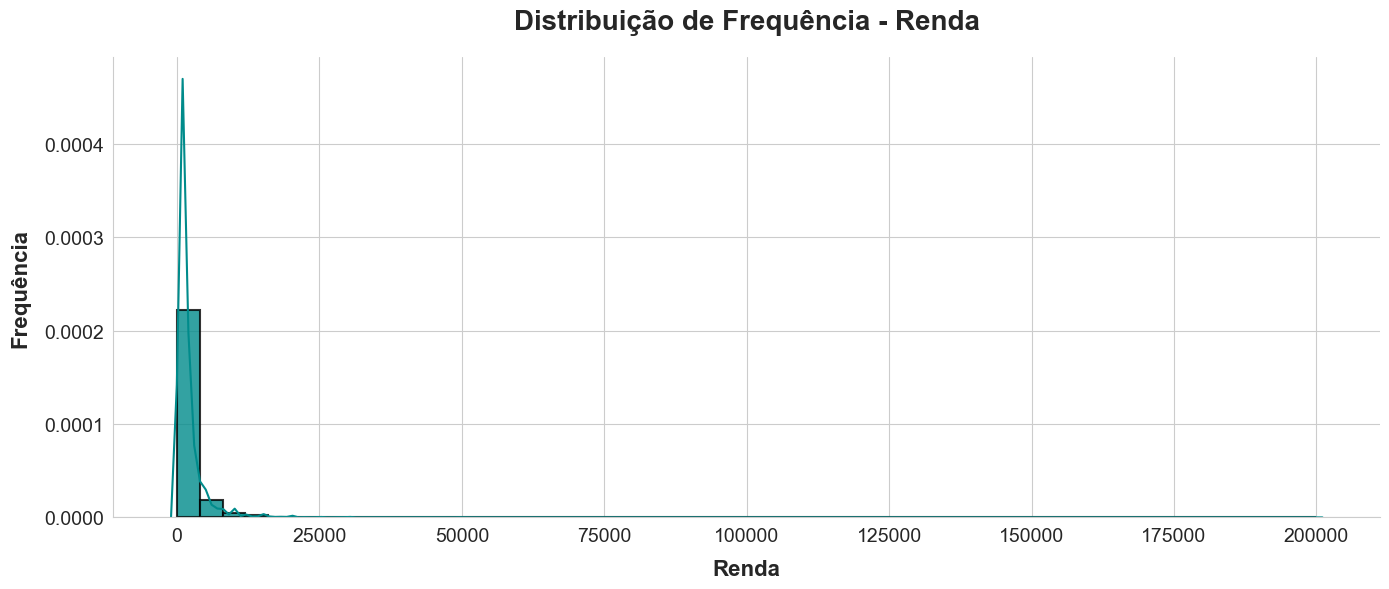

In [62]:
plt.figure(figsize=(14, 6))
sns.set_style('whitegrid')
ax = sns.distplot(df['Renda'], kde=True, hist_kws={'alpha': 0.8, 'edgecolor': 'darkcyan', 'linewidth': 1.5}, color='darkcyan')
ax.set_title('Distribuição de Frequência - Renda', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Renda', fontsize=16, fontweight='bold', labelpad=10)
ax.set_ylabel('Frequência', fontsize=16, fontweight='bold', labelpad=10)
ax.tick_params(labelsize=14)
sns.despine()
plt.tight_layout()
plt.show()

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

In [49]:
df[df.Renda < 20000]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,D
4,11,1,47,8,9,150,1.690631,E
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,E
76836,53,0,30,4,7,1500,1.792934,E
76837,53,0,32,8,12,1300,1.830587,E
76838,53,0,57,8,4,1500,1.726344,E


c:\Users\lnune\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


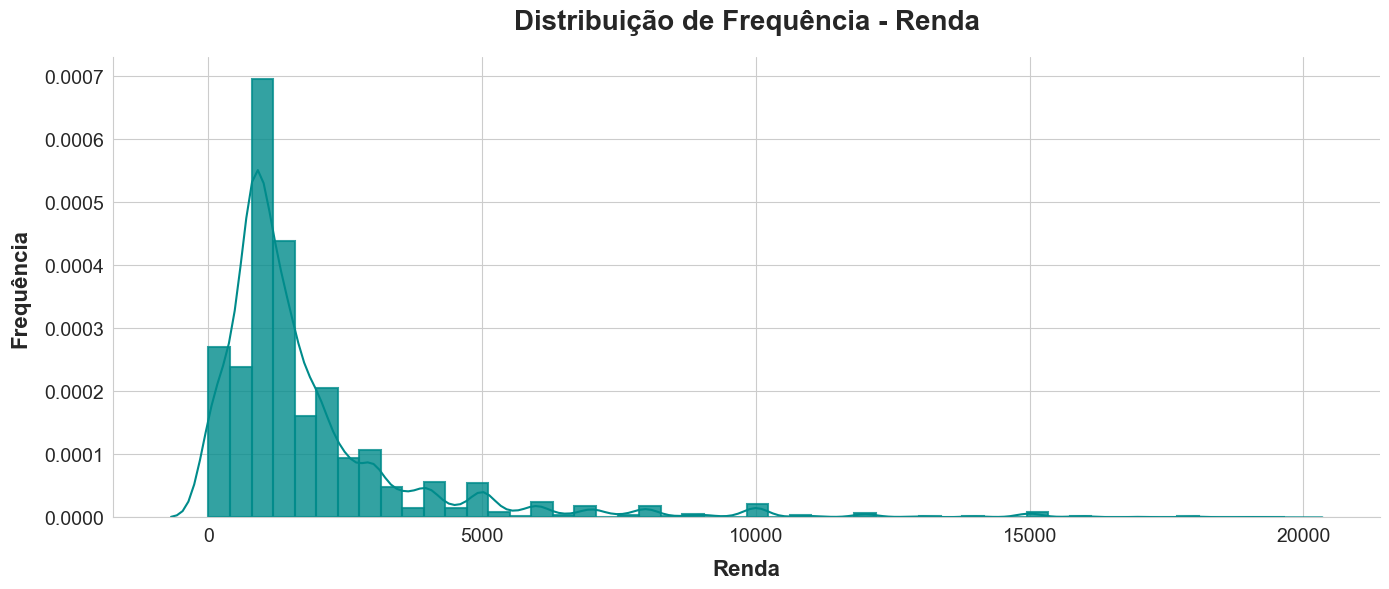

In [90]:
plt.figure(figsize=(14, 6))
sns.set_style('whitegrid')
ax = sns.distplot(df.query('Renda < 20000')['Renda'], kde=True, hist_kws={'alpha': 0.8, 'edgecolor': 'darkcyan', 'linewidth': 1.5}, color='darkcyan')
ax.set_title('Distribuição de Frequência - Renda', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Renda', fontsize=16, fontweight='bold', labelpad=10)
ax.set_ylabel('Frequência', fontsize=16, fontweight='bold', labelpad=10)
ax.tick_params(labelsize=14)
sns.despine()
plt.tight_layout()
plt.show()

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [36]:
frequencia = pd.crosstab(df.Sexo, df.Cor)

frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [21]:
df.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [22]:
df.Renda.median()

1200.0

### Obtenha a moda

In [23]:
df.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [24]:
df.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [25]:
df.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [26]:
df.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [27]:
df[['Renda', 'Sexo', 'Cor']].groupby(['Sexo','Cor']).agg(['mean', 'median', 'max'])

Renda                
                 mean  median     max
Sexo Cor                             
0    0    1081.710938   797.5   10000
     2    2925.744435  1700.0  200000
     4    1603.861687  1200.0   50000
     6    4758.251064  2800.0   50000
     8    1659.577425  1200.0  100000
1    0    2464.386139   788.0  120000
     2    2109.866750  1200.0  100000
     4    1134.596400   800.0   23000
     6    3027.341880  1500.0   20000
     8    1176.758516   800.0   30000

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [28]:
df[['Renda', 'Sexo', 'Cor']].groupby(['Sexo','Cor']).agg(['mad', 'var', 'std'])

Renda                            
                  mad           var           std
Sexo Cor                                         
0    0     798.910889  1.449841e+06   1204.093490
     2    2261.012346  2.257002e+07   4750.791872
     4     975.602482  3.749294e+06   1936.309271
     6    3709.597211  3.295707e+07   5740.824820
     8    1125.827704  5.345747e+06   2312.087184
1    0    3007.892952  1.429818e+08  11957.498292
     2    1670.967106  1.056909e+07   3251.013154
     4     705.453357  1.821960e+06   1349.799809
     6    2549.146322  1.392166e+07   3731.173660
     8     811.580946  2.547960e+06   1596.233048

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

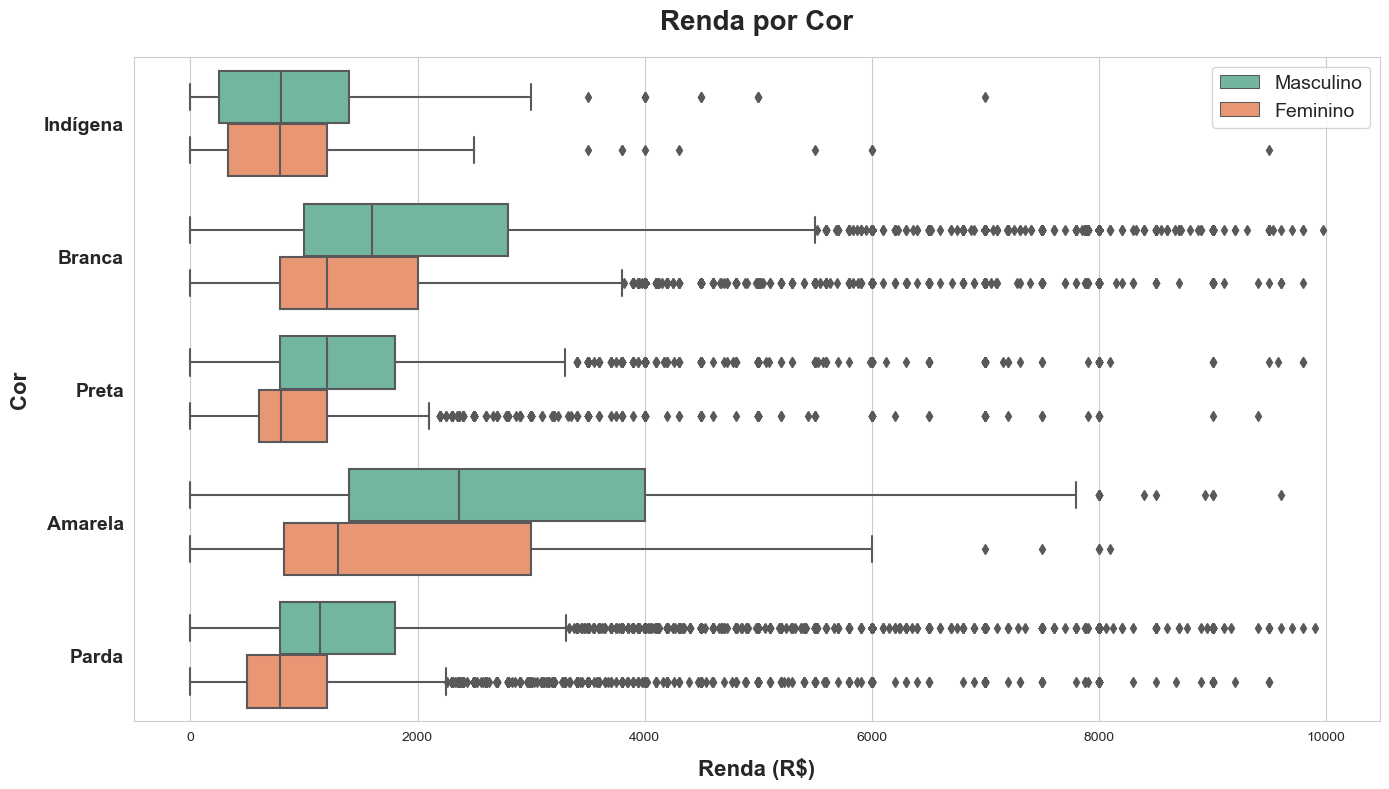

In [92]:
plt.figure(figsize=(14, 8))
sns.set_style('whitegrid')
ax = sns.boxplot(x='Renda', y='Cor', hue='Sexo', data=df.query('Renda < 10000'), orient='h', palette='Set2')
ax.set_title('Renda por Cor', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Renda (R$)', fontsize=16, fontweight='bold', labelpad=10)
ax.set_ylabel('Cor', fontsize=16, fontweight='bold', labelpad=10)
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'], fontsize=14, fontweight='bold')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=14, loc='upper right')
plt.tight_layout()
plt.show()

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [94]:
from scipy import stats

In [96]:
percentual = stats.percentileofscore(df.Renda, 788, kind='weak')
round(percentual, 2)

28.87

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [43]:
df.Renda.quantile(0.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [55]:
df.groupby(['Sexo', 'Anos de Estudo'])['Renda'].agg(['mean', 'median', 'max', 'std'])

mean  median     max          std
Sexo Anos de Estudo                                          
0    1                799.494638   700.0   30000  1023.904884
     2                895.629047   788.0   30000  1331.950552
     3                931.178986   788.0   40000  1435.173827
     4               1109.203862   800.0   80000  2143.800133
     5               1302.329283  1000.0   50000  1419.821787
     6               1338.653218  1045.0   35000  1484.650587
     7               1448.875419  1200.0   25000  1476.628602
     8               1465.497940  1200.0   40000  1419.708673
     9               1639.396667  1300.0   30000  1515.583715
     10              1508.038850  1200.0   60000  2137.664774
     11              1731.270847  1218.0   45000  2078.609734
     12              2117.060504  1500.0  200000  2676.538942
     13              2470.330776  1800.0   30000  2268.081538
     14              3195.099154  2400.0   25000  2797.116800
     15              3706.620269  2500.0   50000  3987.214974
     16              6134.279790  4000.0  200000  7447.613594
     17              1295.761905  1200.0    7000   979.648745
1    1                516.201748   390.0   10000   639.311534
     2                492.771987   400.0    2000   425.291842
     3                529.911638   450.0    4000   498.234168
     4                546.853916   500.0    3500   424.124446
     5                704.279111   788.0   10000   629.553397
     6                781.389776   788.0    8000   635.782641
     7                833.732824   788.0    6000   574.547028
     8                830.751004   788.0    9000   602.038029
     9                933.615351   800.0   18000   896.781213
     10               868.021700   788.0   20000   973.221652
     11               925.919225   800.0    6000   620.611907
     12              1286.790889  1000.0  100000  1819.040417
     13              1682.313725  1200.0  120000  4851.833513
     14              1911.730047  1300.0   20000  2053.789771
     15              2226.460457  1600.0   20000  2064.083336
     16              3899.513231  2800.0  100000  4212.770709
     17               798.174419   788.0    3000   459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

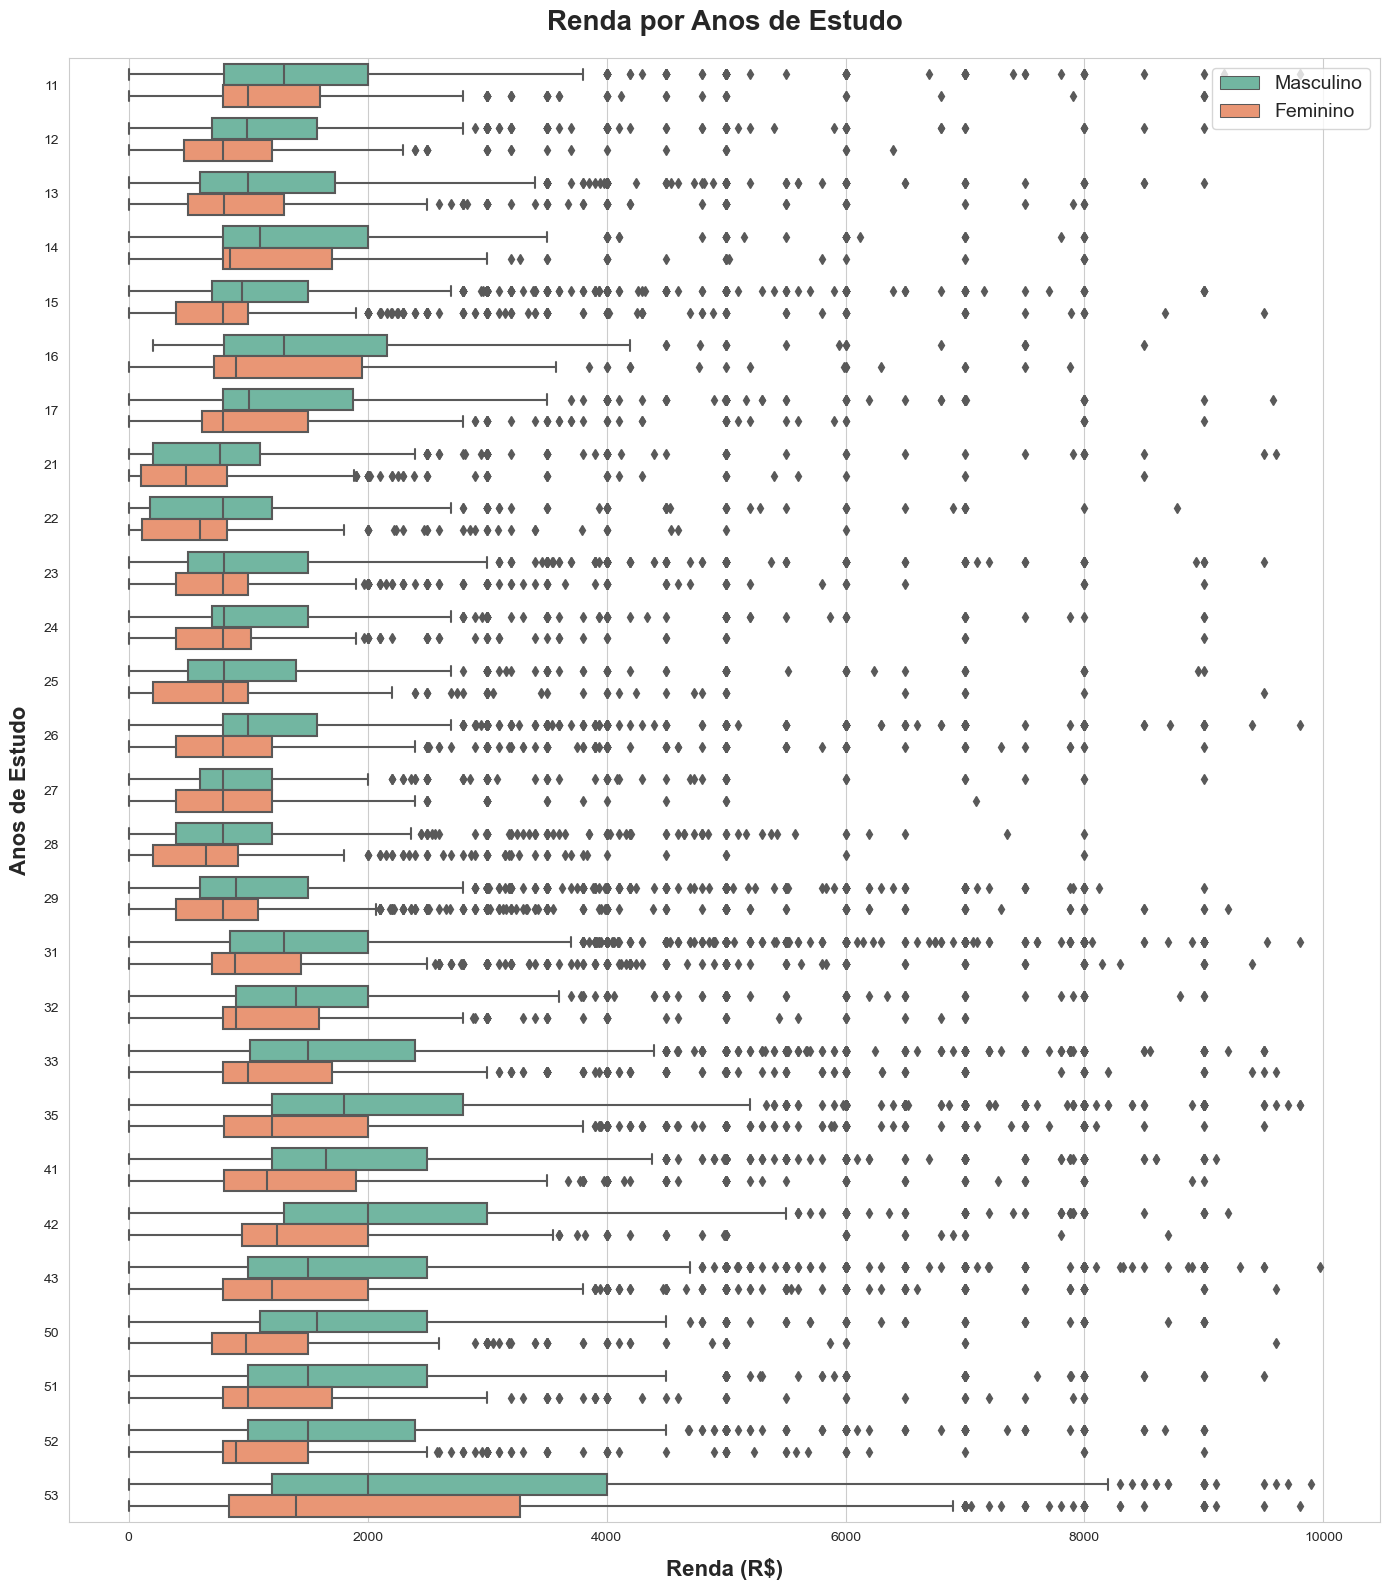

In [113]:
plt.figure(figsize=(14, 16))
sns.set_style('whitegrid')
ax = sns.boxplot(x='Renda', y='UF', hue='Sexo', data=df.query('Renda < 10000'), orient='h', palette='Set2')
ax.set_title('Renda por Anos de Estudo', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Renda (R$)', fontsize=16, fontweight='bold', labelpad=10)
ax.set_ylabel('Anos de Estudo', fontsize=16, fontweight='bold', labelpad=10)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=14, loc='upper right')
plt.tight_layout()
plt.show()

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [56]:
df.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})

Renda                             
           mean  median     max          std
UF                                          
11  1789.761223  1200.0   50000  2406.161161
12  1506.091782   900.0   30000  2276.233415
13  1445.130100   900.0   22000  1757.935591
14  1783.588889  1000.0   20000  2079.659238
15  1399.076871   850.0   50000  2053.779555
16  1861.353516  1200.0   15580  2020.688632
17  1771.094946  1000.0   60000  2934.590741
21  1019.432009   700.0   30000  1887.816905
22  1074.550784   750.0   40000  2373.355726
23  1255.403692   789.0   25000  1821.963536
24  1344.721480   800.0   15500  1651.805500
25  1293.370487   788.0   30000  1950.272431
26  1527.079319   900.0   50000  2389.622497
27  1144.552602   788.0   11000  1237.856197
28  1109.111111   788.0   16000  1478.997878
29  1429.645094   800.0  200000  3507.917248
31  2056.432084  1200.0  100000  3584.721547
32  2026.383852  1274.0  100000  3513.846868
33  2496.403168  1400.0  200000  5214.583518
35  2638.104986  1600.0   80000  3503.777366
41  2493.870753  1500.0  200000  4302.937995
42  2470.854945  1800.0   80000  3137.651112
43  2315.158336  1500.0   35000  2913.335783
50  2262.604167  1500.0   42000  3031.419122
51  2130.652778  1500.0   35000  2542.630178
52  1994.580794  1500.0   30000  2221.933065
53  4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

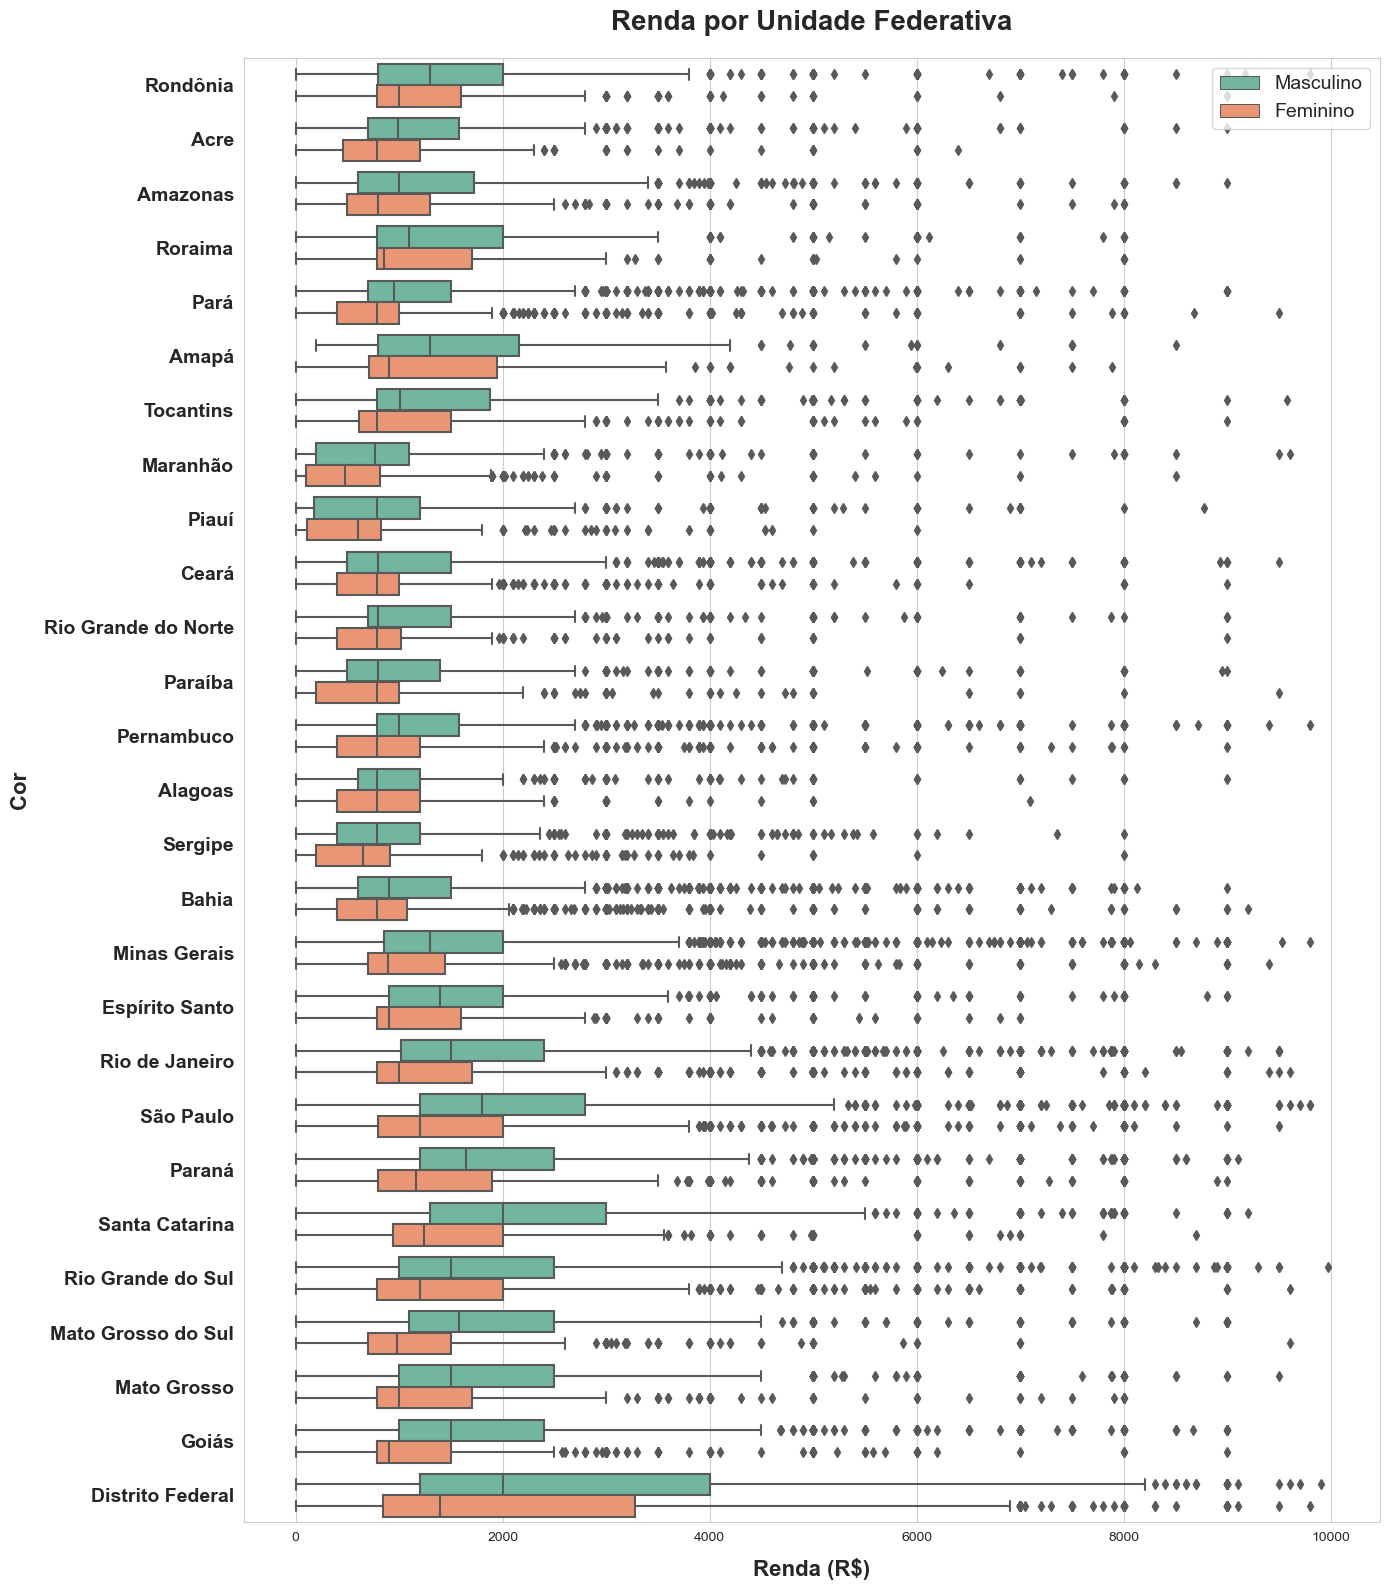

In [103]:
plt.figure(figsize=(14, 16))
sns.set_style('whitegrid')
ax = sns.boxplot(x='Renda', y='UF', hue='Sexo', data=df.query('Renda < 10000'), orient='h', palette='Set2')
ax.set_title('Renda por Unidade Federativa', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Renda (R$)', fontsize=16, fontweight='bold', labelpad=10)
ax.set_ylabel('Cor', fontsize=16, fontweight='bold', labelpad=10)
ax.set_yticklabels([v for v in uf.values()], fontsize=14, fontweight='bold')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=14, loc='upper right')
plt.tight_layout()
plt.show()

> ### Conclusões

Escreva suas conclusões aqui...